<a href="https://colab.research.google.com/github/LeoPVL/pong/blob/master/pong_simple_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gym
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/pong"

/content/drive/My Drive/pong


In [ ]:
env = gym.make('Pong-v0')
NUM_ACTIONS = env.action_space.n
print('Actions: {}'.format(NUM_ACTIONS))

Actions: 6


In [ ]:
lr = 0.00005 # learning rate
gamma = 0.99 # discount factor for reward

NUM_EPISODES = 15000 # each game continues till 21 score
MAX_STEPS = 2500 # every episode max steps
BATCH_SIZE = 700
REPLAY_BUFFER_SIZE = 1000 # buffer to save frames for taking batch
REWARD_AVERAGE_WINDOW = 20 # statistic
########################################################################################################################################################################

In [ ]:
# simple model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(80, 80, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_ACTIONS, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 77, 77, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        4160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0

In [ ]:
def prepro(frame):
  """ 210x160x3 frame into 80x80 for faster fitting """
  test = 35
  frame = frame[test:test+160] # crop - remove score and frame
  frame = stframeate[::2,::2,0] # downsample by factor of 2.
  frame[frame == 144] = 0 # erase background (background type 1)
  frame[frame == 109] = 0 # erase background (background type 2)
  frame[frame != 0] = 1 # everything else set to 1 for better moving look
  
  return frame.astype(np.float32)

In [ ]:
def find_motion(s_old,s_new):
  """ find difference between two frames """
  inp = 2*prepro(s_old)-prepro(s_new)
  inp[inp == -1] = 1
  inp[inp == 2] = 0.5

  return inp

In [ ]:
def evalQ(s_old,s_new):
    inp = find_motion(s_old,s_new)
    out = model(inp[None,...,None])
    return out.numpy()[0]

In [ ]:
def loss(q1, q2):
    return tf.reduce_sum(tf.square(q1 - q2))

optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
model.compile(loss=loss, optimizer=optimizer)
model.load_weights('./best_score/pong_weights')

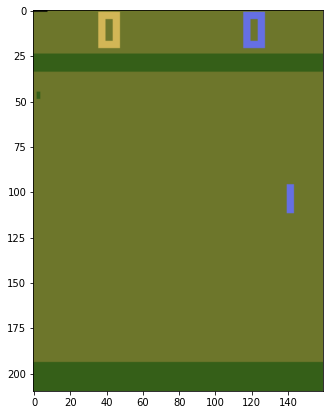

4


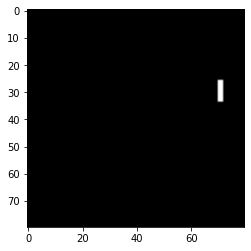

4


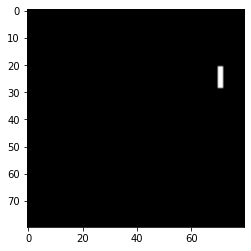

4


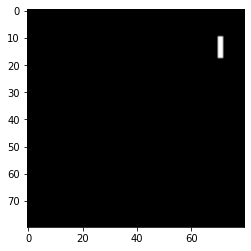

4


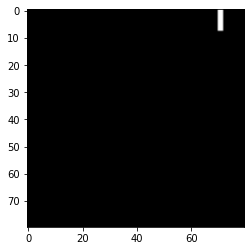

4


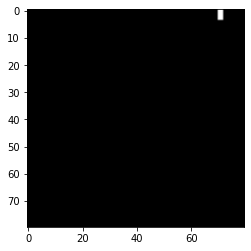

4


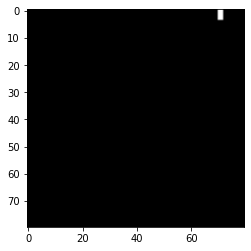

4


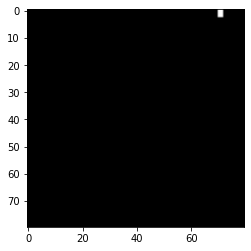

4


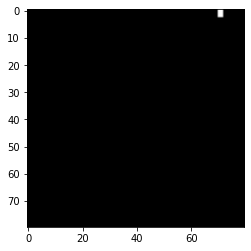

4


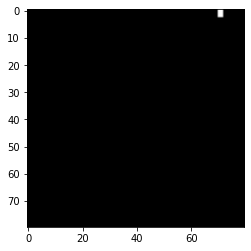

4


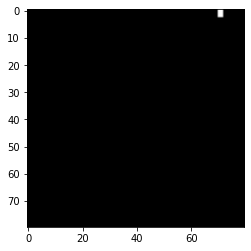

4


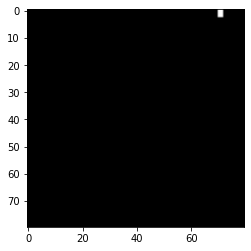

4


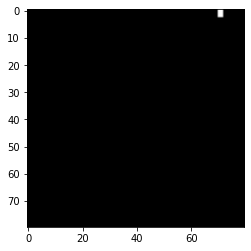

4


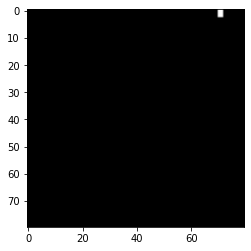

4


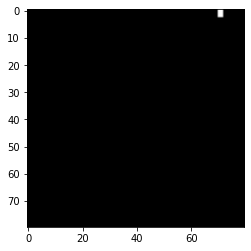

4


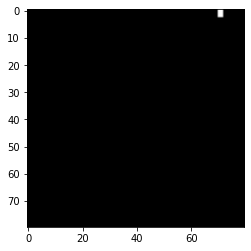

5


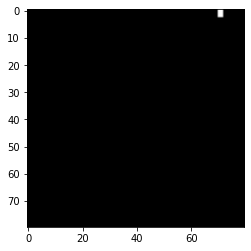

5


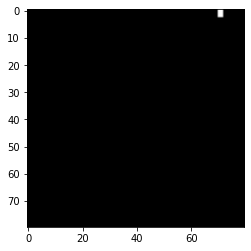

5


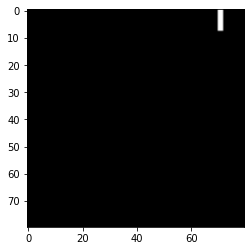

5


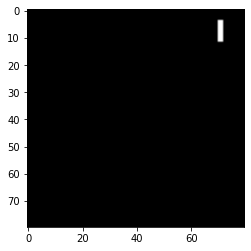

5


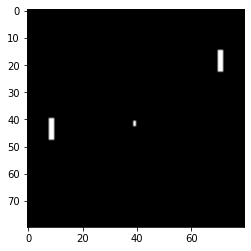

5


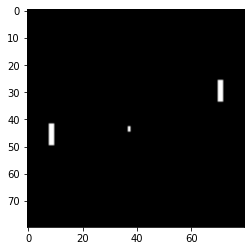

5


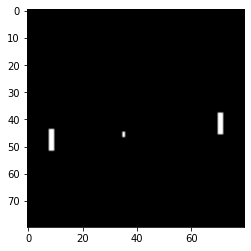

5


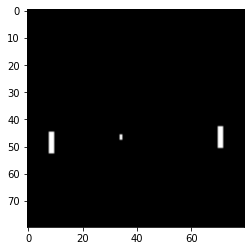

5


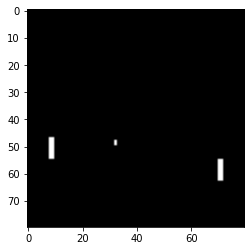

5


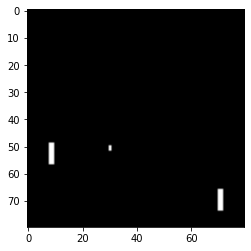

5


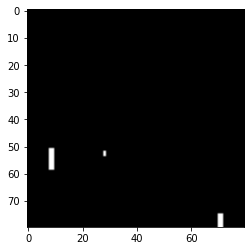

5


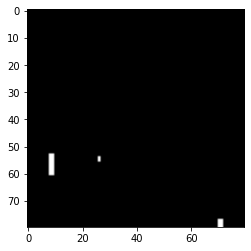

5


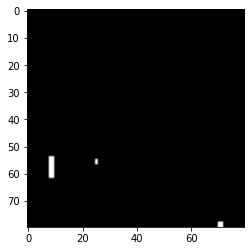

5


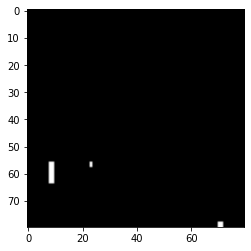

5


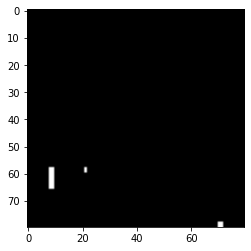

In [ ]:
s = env.reset()
plt.figure(figsize=(7, 7))
plt.imshow(s, cmap="gray")
plt.show()

up = 4
down = 5
for _ in range(15):
  s1, r, done, _ = env.step(up)
  print(up)
  plt.figure()
  plt.imshow(prepro(s1), cmap="gray")
  plt.show()
#
for _ in range(15):
  s1, r, done, _ = env.step(down)
  print(down)
  plt.figure()
  plt.imshow(prepro(s1), cmap="gray")
  plt.show()
#


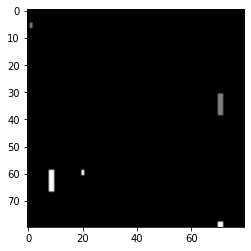

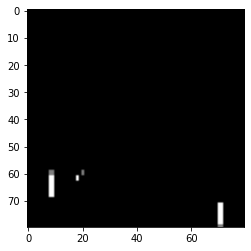

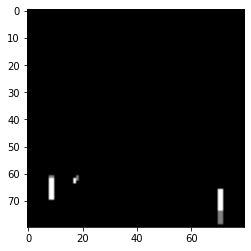

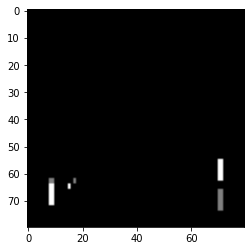

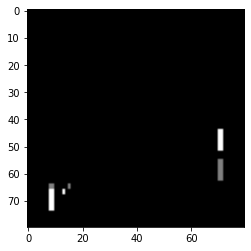

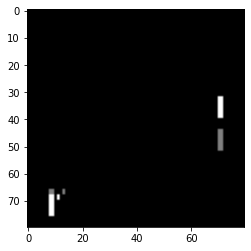

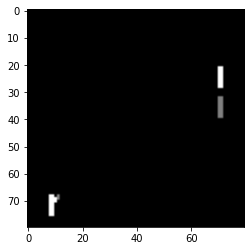

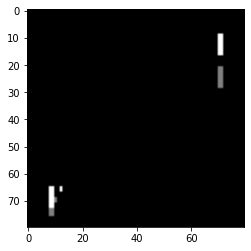

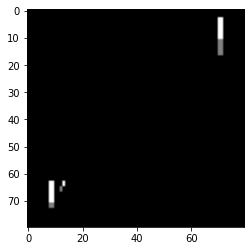

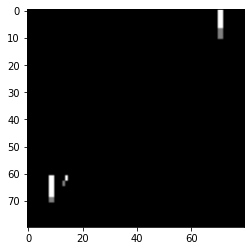

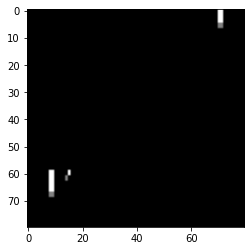

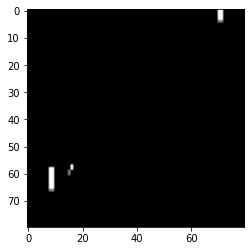

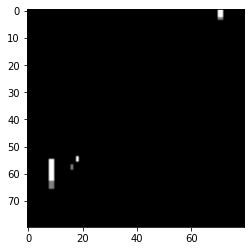

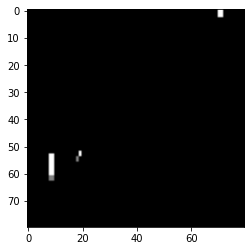

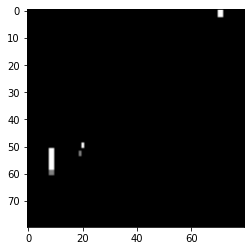

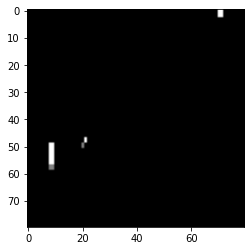

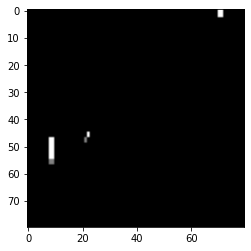

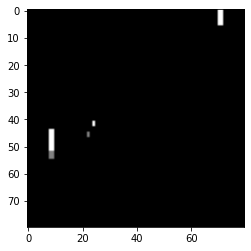

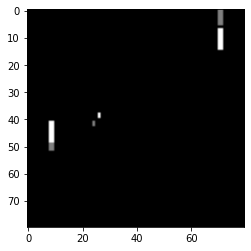

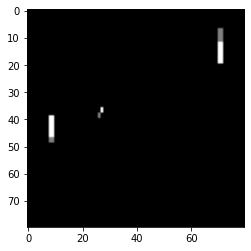

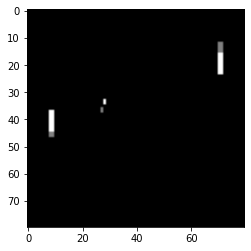

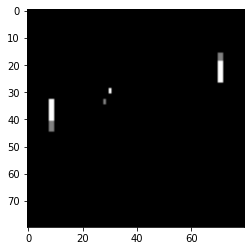

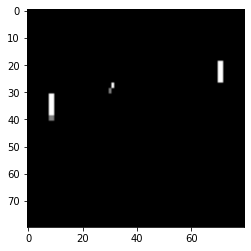

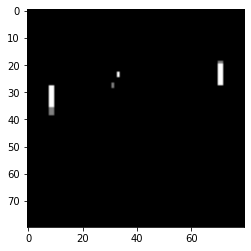

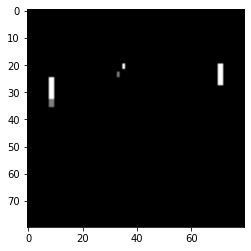

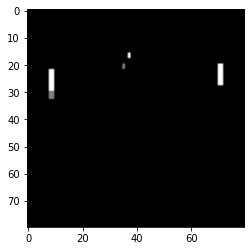

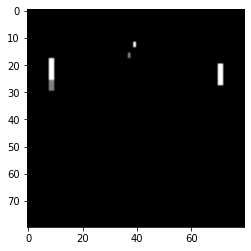

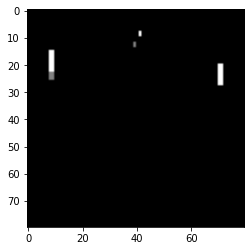

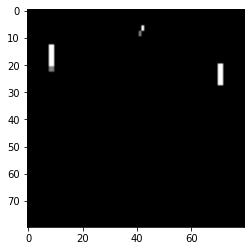

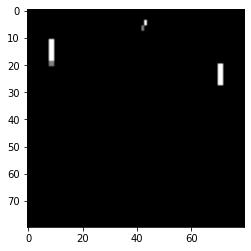

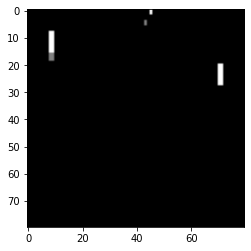

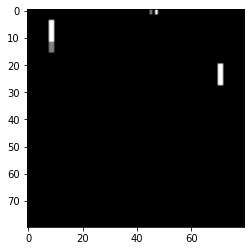

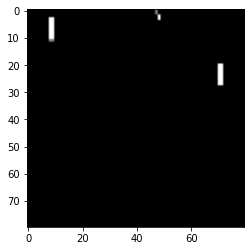

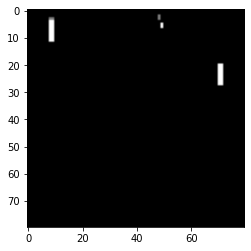

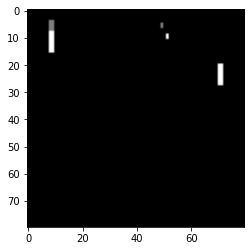

In [ ]:
s_old = s
for _ in range(15):
  s_new, r, done, _ = env.step(up)
  plt.figure()
  plt.imshow(find_motion(s_old,s_new), cmap="gray")
  plt.show()
  s_old = s_new

for _ in range(5):
  s_new, r, done, _ = env.step(down)
  plt.figure()
  plt.imshow(find_motion(s_old,s_new), cmap="gray")
  plt.show()
  s_old = s_new

for _ in range(15):
  s_new, r, done, _ = env.step(0)
  plt.figure()
  plt.imshow(find_motion(s_old,s_new), cmap="gray")
  plt.show()
  s_old = s_new


In [ ]:
def discount_rewards(r):
  """ take 1D float array of rewards and compute discounted reward """
  """ this function discounts from the action closest to the end of the completed game backwards
  so that the most recent action has a greater weight """
  discounted_r = np.zeros_like(r)
  running_add = 0
  for t in reversed(range(0, len(r))):
    if r[t] != 0: running_add = 0 # reset the sum, since this was a game boundary
    running_add = running_add * gamma + r[t]
    discounted_r[t] = running_add
  
  return discounted_r

Episode 8100
step 2078
Reward -20.0


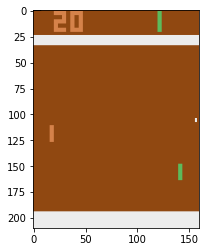

Episode 8100: average total reward = -14.65, best_score = -7
[-17.0, -15.0, -19.0, -16.0, -16.0, -18.0, -5.0, -13.0, -13.0, -5.0, -13.0, -15.0, -17.0, -17.0, -12.0, -16.0, -17.0, -17.0, -12.0, -20.0]
Episode 8200
step 2069
Reward -19.0


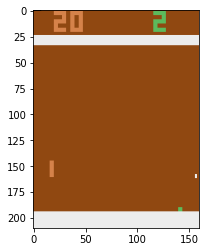

Episode 8200: average total reward = -15.2, best_score = -7
[-12.0, -17.0, -20.0, -19.0, -17.0, -13.0, -11.0, -17.0, -9.0, -11.0, -15.0, -18.0, -15.0, -16.0, -17.0, -17.0, -16.0, -11.0, -14.0, -19.0]
Episode 8300
step 2377
Reward -16.0


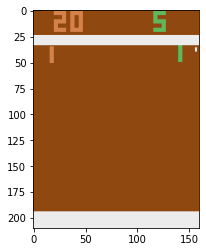

Episode 8300: average total reward = -17.0, best_score = -7
[-15.0, -18.0, -17.0, -15.0, -17.0, -17.0, -16.0, -19.0, -19.0, -18.0, -17.0, -17.0, -18.0, -15.0, -16.0, -15.0, -19.0, -18.0, -18.0, -16.0]
Episode 8400
step 2449
Reward -16.0


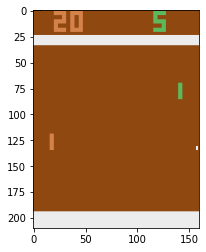

Episode 8400: average total reward = -16.75, best_score = -7
[-14.0, -17.0, -20.0, -19.0, -17.0, -20.0, -17.0, -17.0, -20.0, -13.0, -21.0, -16.0, -13.0, -17.0, -19.0, -17.0, -15.0, -19.0, -8.0, -16.0]
Episode 8500
step 1658
Reward -20.0


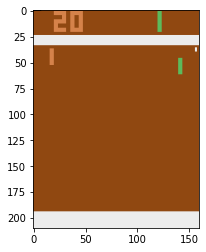

Episode 8500: average total reward = -16.05, best_score = -7
[-19.0, -17.0, -19.0, -18.0, -11.0, -17.0, -18.0, -17.0, -16.0, -9.0, -5.0, -18.0, -16.0, -16.0, -17.0, -17.0, -15.0, -19.0, -17.0, -20.0]
Episode 8600
step 2107
Reward -17.0


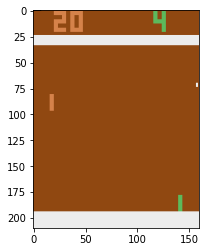

Episode 8600: average total reward = -14.55, best_score = -7
[-7.0, -17.0, -13.0, -16.0, -15.0, -18.0, -19.0, -15.0, -14.0, -19.0, -12.0, -10.0, -18.0, -16.0, -14.0, -10.0, -9.0, -15.0, -17.0, -17.0]
Episode 8700
step 2481
Reward -17.0


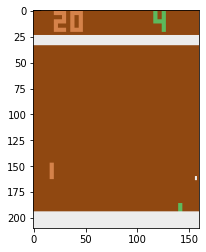

Episode 8700: average total reward = -16.1, best_score = -7
[-14.0, -15.0, -17.0, -20.0, -18.0, -17.0, -9.0, -9.0, -17.0, -16.0, -21.0, -16.0, -14.0, -17.0, -11.0, -18.0, -20.0, -17.0, -19.0, -17.0]
Episode 8800
step 2135
Reward -16.0


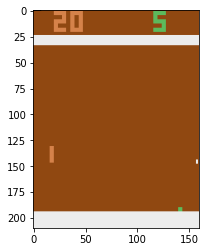

Episode 8800: average total reward = -15.55, best_score = -7
[-18.0, -16.0, -16.0, -19.0, -15.0, -4.0, -15.0, -15.0, -17.0, -15.0, -16.0, -13.0, -18.0, -15.0, -16.0, -18.0, -17.0, -13.0, -19.0, -16.0]
Episode 8900
step 1769
Reward -20.0


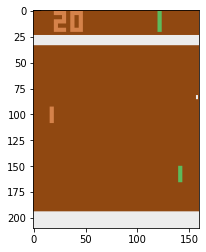

Episode 8900: average total reward = -16.15, best_score = -7
[-17.0, -14.0, -17.0, -14.0, -16.0, -13.0, -20.0, -9.0, -11.0, -17.0, -18.0, -21.0, -18.0, -17.0, -17.0, -12.0, -15.0, -18.0, -19.0, -20.0]
Episode 9000
step 1900
Reward -19.0


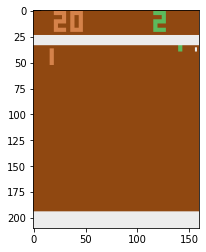

Episode 9000: average total reward = -14.9, best_score = -7
[-17.0, -17.0, -8.0, -12.0, -18.0, -10.0, -18.0, -13.0, -16.0, -20.0, -11.0, -18.0, -18.0, -11.0, -14.0, -18.0, -16.0, -14.0, -10.0, -19.0]
Episode 9100
step 2154
Reward -18.0


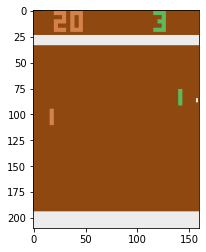

Episode 9100: average total reward = -14.4, best_score = -7
[-13.0, -9.0, -13.0, -11.0, -14.0, -14.0, -10.0, -18.0, -17.0, -13.0, -11.0, -14.0, -17.0, -16.0, -11.0, -17.0, -17.0, -18.0, -17.0, -18.0]
Episode 9200
step 2197
Reward -16.0


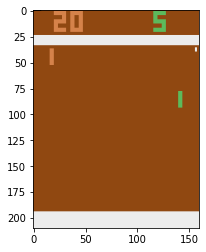

Episode 9200: average total reward = -15.65, best_score = -7
[-19.0, -17.0, -15.0, -16.0, -18.0, -20.0, -18.0, -15.0, -13.0, -10.0, -16.0, -18.0, -14.0, -8.0, -18.0, -13.0, -14.0, -18.0, -17.0, -16.0]
Episode 9300
step 2019
Reward -18.0


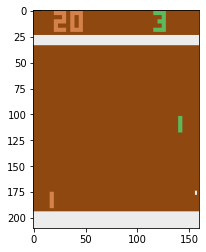

Episode 9300: average total reward = -15.05, best_score = -7
[-18.0, -17.0, -16.0, -15.0, -17.0, -16.0, -16.0, -11.0, -12.0, -14.0, -15.0, -15.0, -16.0, -6.0, -18.0, -17.0, -12.0, -17.0, -15.0, -18.0]
Episode 9400
step 2371
Reward -15.0


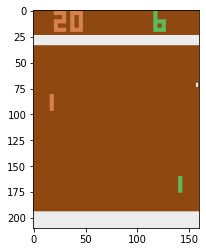

Episode 9400: average total reward = -15.7, best_score = -7
[-17.0, -12.0, -19.0, -17.0, -15.0, -19.0, -17.0, -13.0, -17.0, -16.0, -20.0, -17.0, -18.0, -18.0, -13.0, -9.0, -13.0, -14.0, -15.0, -15.0]
Episode 9500
step 1664
Reward -18.0


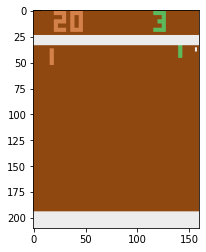

Episode 9500: average total reward = -15.05, best_score = -7
[-12.0, -17.0, -12.0, -14.0, -6.0, -14.0, -17.0, -13.0, -16.0, -19.0, -18.0, -17.0, -15.0, -12.0, -18.0, -16.0, -15.0, -18.0, -14.0, -18.0]
Episode 9600
step 2224
Reward -20.0


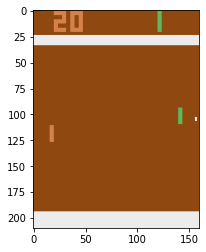

Episode 9600: average total reward = -15.0, best_score = -7
[-9.0, -13.0, -17.0, -15.0, -18.0, -13.0, -18.0, -19.0, -19.0, -11.0, -10.0, -11.0, -16.0, -17.0, -19.0, -14.0, -9.0, -18.0, -14.0, -20.0]
Episode 9700
step 2500
Reward -13.0


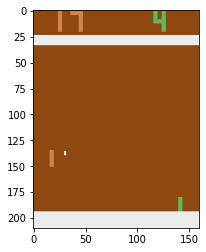

Episode 9700: average total reward = -13.45, best_score = -7
[-12.0, -14.0, -10.0, -10.0, -17.0, -10.0, -14.0, -7.0, -17.0, -11.0, -15.0, -20.0, -13.0, -19.0, -15.0, -9.0, -18.0, -14.0, -11.0, -13.0]
Episode 9800
step 2500
Reward -10.0


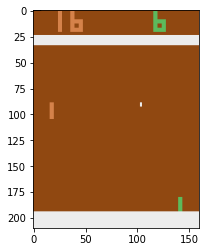

Episode 9800: average total reward = -13.55, best_score = -7
[-17.0, -15.0, -7.0, -18.0, -11.0, -17.0, -12.0, -8.0, -15.0, -16.0, -14.0, -14.0, -15.0, -14.0, -16.0, -14.0, -12.0, -13.0, -13.0, -10.0]
Episode 9900
step 2357
Reward -17.0


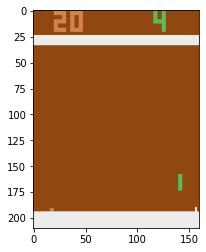

Episode 9900: average total reward = -13.35, best_score = -7
[-15.0, -10.0, -17.0, -14.0, -13.0, -13.0, -15.0, -13.0, -17.0, -15.0, -11.0, -13.0, -14.0, -16.0, -10.0, -11.0, -13.0, -8.0, -12.0, -17.0]
Episode 10000
step 2168
Reward -18.0


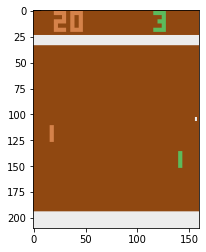

Episode 10000: average total reward = -13.65, best_score = -7
[-17.0, -7.0, -11.0, -19.0, -12.0, -16.0, -16.0, -17.0, -10.0, -14.0, -5.0, -7.0, -18.0, -14.0, -19.0, -16.0, -9.0, -14.0, -14.0, -18.0]
Episode 10100
step 1908
Reward -16.0


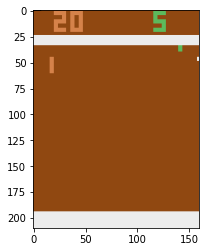

Episode 10100: average total reward = -14.55, best_score = -7
[-13.0, -12.0, -9.0, -17.0, -17.0, -17.0, -16.0, -12.0, -13.0, -15.0, -18.0, -14.0, -18.0, -13.0, -10.0, -17.0, -15.0, -12.0, -17.0, -16.0]
Episode 10200
step 2500
Reward -13.0


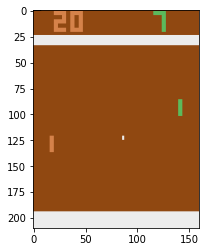

Episode 10200: average total reward = -13.8, best_score = -7
[-18.0, -11.0, -16.0, -7.0, -8.0, -13.0, -10.0, -17.0, -19.0, -12.0, -15.0, -12.0, -19.0, -15.0, -19.0, -12.0, -13.0, -12.0, -15.0, -13.0]
Episode 10300
step 2500
Reward -15.0


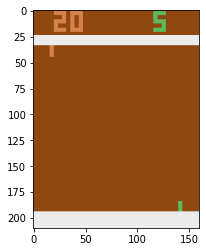

Episode 10300: average total reward = -13.1, best_score = -7
[-12.0, -16.0, -11.0, -14.0, -10.0, -12.0, -12.0, -18.0, -13.0, -16.0, -8.0, -18.0, -4.0, -14.0, -10.0, -17.0, -11.0, -14.0, -17.0, -15.0]
Episode 10400
step 2500
Reward -13.0


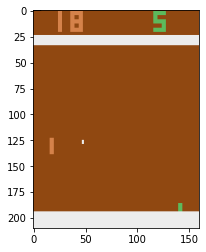

Episode 10400: average total reward = -14.15, best_score = -7
[-8.0, -12.0, -13.0, -14.0, -15.0, -15.0, -16.0, -15.0, -18.0, -20.0, -18.0, -15.0, -16.0, -8.0, -15.0, -11.0, -17.0, -15.0, -9.0, -13.0]
Episode 10500
step 2500
Reward -14.0


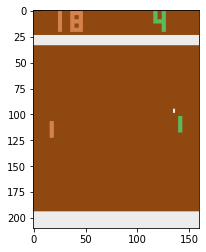

Episode 10500: average total reward = -14.3, best_score = -7
[-6.0, -18.0, -18.0, -19.0, -13.0, -8.0, -16.0, -18.0, -16.0, -10.0, -6.0, -18.0, -13.0, -16.0, -15.0, -17.0, -13.0, -16.0, -16.0, -14.0]
Episode 10600
step 2500
Reward -10.0


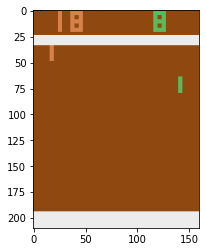

Episode 10600: average total reward = -13.9, best_score = -7
[-15.0, -14.0, -15.0, -11.0, -12.0, -15.0, -11.0, -7.0, -17.0, -16.0, -12.0, -12.0, -11.0, -18.0, -15.0, -15.0, -17.0, -17.0, -18.0, -10.0]
Episode 10700
step 2048
Reward -16.0


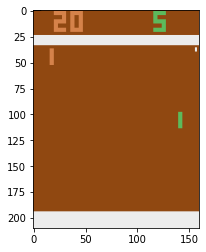

Episode 10700: average total reward = -13.15, best_score = -7
[-17.0, -12.0, -18.0, -9.0, -15.0, -15.0, -9.0, -16.0, -14.0, -9.0, -13.0, -15.0, -6.0, -11.0, -10.0, -18.0, -14.0, -12.0, -14.0, -16.0]
Episode 10800
step 2500
Reward -9.0


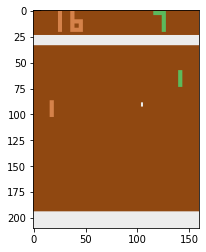

Episode 10800: average total reward = -13.15, best_score = -7
[-6.0, -12.0, -14.0, -12.0, -13.0, -16.0, -17.0, -19.0, -13.0, -18.0, -7.0, -12.0, -10.0, -20.0, -14.0, -18.0, -13.0, -11.0, -9.0, -9.0]
Episode 10900
step 2500
Reward -7.0


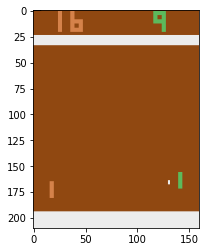

Episode 10900: average total reward = -12.55, best_score = -7
[-14.0, -16.0, -8.0, -5.0, -16.0, -19.0, -14.0, -11.0, -16.0, -15.0, -15.0, -13.0, -11.0, -10.0, -5.0, -10.0, -18.0, -15.0, -13.0, -7.0]
Episode 11000
step 2283
Reward -16.0


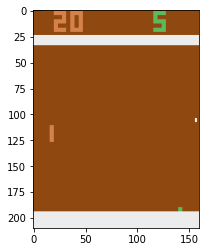

Episode 11000: average total reward = -12.5, best_score = -7
[-12.0, -8.0, -13.0, -8.0, -17.0, -7.0, -17.0, -17.0, -13.0, -7.0, -14.0, -17.0, -17.0, -9.0, -17.0, -7.0, -7.0, -15.0, -12.0, -16.0]
Episode 11100
step 2500
Reward -12.0


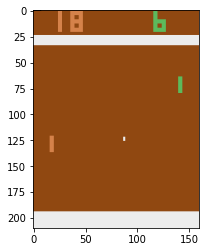

Episode 11100: average total reward = -13.85, best_score = -7
[-12.0, -15.0, -18.0, -15.0, -15.0, -16.0, -12.0, -15.0, -13.0, -15.0, -14.0, -11.0, -15.0, -18.0, -12.0, -10.0, -12.0, -15.0, -12.0, -12.0]
Episode 11200
step 2500
Reward -9.0


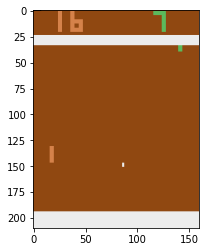

Episode 11200: average total reward = -11.6, best_score = -7
[-12.0, -16.0, -10.0, -13.0, -13.0, -2.0, -14.0, -8.0, -14.0, -10.0, -10.0, -16.0, -16.0, -9.0, -9.0, -12.0, -13.0, -10.0, -16.0, -9.0]
Episode 11300
step 2500
Reward -10.0


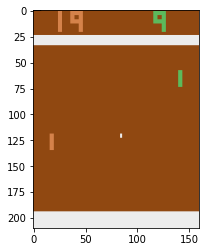

Episode 11300: average total reward = -11.7, best_score = -7
[-7.0, -9.0, -11.0, -9.0, -9.0, -9.0, -8.0, -18.0, -8.0, -9.0, -18.0, -20.0, -9.0, -17.0, -9.0, -19.0, -9.0, -10.0, -16.0, -10.0]
Episode 11400
step 2500
Reward -13.0


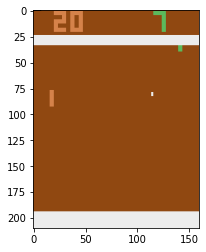

Episode 11400: average total reward = -11.75, best_score = -7
[-13.0, -11.0, -8.0, -7.0, -15.0, -16.0, -14.0, -14.0, -10.0, -10.0, -17.0, -16.0, -9.0, -11.0, -14.0, -8.0, -1.0, -16.0, -12.0, -13.0]
Episode 11500
step 2500
Reward -9.0


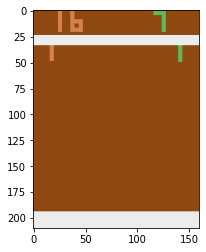

Episode 11500: average total reward = -11.15, best_score = -7
[-11.0, -13.0, -7.0, -16.0, -6.0, -13.0, -12.0, -15.0, -5.0, -16.0, -16.0, -16.0, -5.0, -14.0, -15.0, -5.0, -8.0, -10.0, -11.0, -9.0]
Episode 11600
step 2500
Reward -8.0


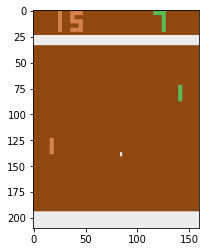

Episode 11600: average total reward = -10.25, best_score = -7
[-8.0, -7.0, -9.0, -16.0, -6.0, -8.0, -17.0, -15.0, -18.0, -9.0, -11.0, -14.0, -4.0, -14.0, -15.0, -5.0, -6.0, -9.0, -6.0, -8.0]
Episode 11700
step 2500
Reward -14.0


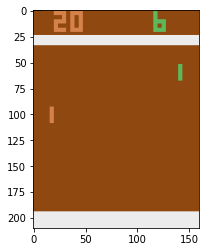

Episode 11700: average total reward = -10.35, best_score = -7
[-9.0, -17.0, -9.0, -14.0, -7.0, -3.0, -7.0, -11.0, -14.0, -8.0, -12.0, -5.0, -13.0, -5.0, -8.0, -14.0, -13.0, -18.0, -6.0, -14.0]


In [ ]:
totalRewardList = [] 
totalRewardAverageList = [] 
replay_buffer = []
Q_buffer = []
actions_buffer = []
reward_buffer = []

# previous fitting best_score
best_score = -9
for i in range(11701,NUM_EPISODES+1):
    # eps-greedy
    eps = 1.0 - i / NUM_EPISODES

    s_old = np.zeros((210,160,3))
    s_new = env.reset()
    totalReward = 0
    step = 0

    while step < MAX_STEPS:
        step += 1

        Q_s = evalQ(s_old,s_new)
        a = np.argmax(Q_s)
        # eps-greedy
        if np.random.rand() < eps:
            # random action
            a = env.action_space.sample()
        else:
            a = np.argmax(Q_s)
        s1_old = s_new
        s1_new, r, done, _ = env.step(a)
        totalReward += r

        inp = find_motion(s_old,s_new)

        # save all info
        replay_buffer.append(inp[...,None])
        Q_buffer.append(Q_s)
        actions_buffer.append(a)
        reward_buffer.append(r)

        

        if (done):
          # calculate Q_target
          reward_buffer = discount_rewards(reward_buffer)
          Q_target_buffer = []
          for count,Q in enumerate(Q_buffer):
            Q[actions_buffer[count]]=reward_buffer[count]/2+0.5
            Q_target_buffer.append(Q)
          
          # take random batch from last game
          random_batch_pos = int((REPLAY_BUFFER_SIZE - BATCH_SIZE)*np.random.rand())
          batch = np.array(replay_buffer[random_batch_pos:random_batch_pos+BATCH_SIZE])
          labels = np.array(Q_target_buffer[random_batch_pos:random_batch_pos+BATCH_SIZE])

          model.train_on_batch(batch,labels)
          
          # reset buffers
          replay_buffer = []
          Q_buffer = []
          Q_target_buffer = []
          actions_buffer = []
          reward_buffer = []

        s_old = s1_old
        s_new = s1_new
        if (done):
            break

    # statistic and other stuff
    if i % 100 == 0:
      print('Episode',i)
      print('step',step)
      print('Reward',totalReward)
      plt.imshow(s1_new, cmap="gray")
      plt.show()
      model.save_weights('pong_weights')

    totalRewardList.append(totalReward)

    totalRewardAverage = np.mean(totalRewardList[-REWARD_AVERAGE_WINDOW:])
    if totalRewardAverage > best_score:
      best_score = totalRewardAverage
      print(f'New best score: {best_score}')
      model.save_weights('best_score//pong_weights')

    if i % REWARD_AVERAGE_WINDOW == 0 and i >= REWARD_AVERAGE_WINDOW and len(totalRewardList)>2:
        totalRewardAverage = np.mean(totalRewardList[-REWARD_AVERAGE_WINDOW:])
        totalRewardAverageList.append(totalRewardAverage)
        if i % 100 == 0:
            print('Episode {}: average total reward = {}, best_score = {}'.format(i, totalRewardAverage,best_score))
            print(totalRewardList[-REWARD_AVERAGE_WINDOW:])

In [ ]:
plt.plot(totalRewardAverageList)
plt.grid()

Inference


In [ ]:
from IPython import display
def show_state(env, step=0, info=""):
    """ we can see the game """
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    # plt.title("%s | Step: %d %s" % (env,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())
    

In [ ]:
test_episodes = 2000
for game_num in range(20):
  totalReward = 0
  s_old = np.zeros((210,160,3))
  s_new = env.reset()
  for i in range(test_episodes):
      # show_state(env, i, "")
      # print(1)
      a = np.argmax(evalQ(s_old,s_new)) 
      
      s_old = s_new
      s_new, r, done, __ = env.step(a)
      totalReward += r
      if done:
          print('Game number {}. Total reward = {}'.format(game_num,totalReward))
          if totalReward > -2:
            plt.figure(figsize=(7, 7))
            plt.imshow(s_new, cmap="gray")
            plt.show()

          break
      elif i==test_episodes-1:
        print('Game number {}. Draw. Total reward = {}'.format(game_num,totalReward))
        if totalReward > -2:
          plt.figure(figsize=(7, 7))
          plt.imshow(s_new, cmap="gray")
          plt.show()
env.close()
